# Capstone Project: Healthcare - PGP
**Problem Statement:**
* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**Dataset Description:**
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.
 
**Variables	- Description**
* Pregnancies -	Number of times pregnant
* Glucose - Plasma glucose concentration in an oral glucose tolerance test
* BloodPressure	- Diastolic blood pressure (mm Hg)
* SkinThickness	- Triceps skinfold thickness (mm)
* Insulin - Two hour serum insulin
* BMI - Body Mass Index
* DiabetesPedigreeFunction - Diabetes pedigree function
* Age - Age in years
* Outcome - Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

### Week 1:

**Data Exploration:**
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

        • Glucose
        • BloodPressure
        • SkinThickness
        • Insulin
        • BMI
2. Visually explore these variables using histograms. Treat the missing values accordingly.
3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

### Week 2:
**Data Exploration:**
1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.
2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.
3. Perform correlation analysis. Visually explore it using a heat map.

### Week 3:
**Data Modeling:**
1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.
2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

### Week 4:
**Data Modeling:**
1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

**Data Reporting:**

2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

        a. Pie chart to describe the diabetic or non-diabetic population
        b. Scatter charts between relevant variables to analyze the relationships
        c. Histogram or frequency charts to analyze the distribution of the data
        d. Heatmap of correlation analysis among the relevant variables
        e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.
#### >>>>>-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->>>>>

# Solution:
## Week 1:

### Data Exploration:
**(1) Read Data and Perform descriptive analysis:**

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.2)
import warnings
warnings.simplefilter('ignore', FutureWarning)


In [78]:
df = pd.read_csv('health care diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

According to problem statement, a value of zero in the following columns  indicates missing value:
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI

We will replace zeros in these columns with null values.

In [81]:
L=['Pregnancies','Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Outcome']
for i in L:
  if 0 in df[i].values:
    print(i, " : ", "yes")

  else:
    print(i ," : " ,"no")

Pregnancies  :  yes
Age  :  no
Glucose  :  yes
BloodPressure  :  yes
SkinThickness  :  yes
Insulin  :  yes
BMI  :  yes
DiabetesPedigreeFunction  :  no
Outcome  :  yes


In [82]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [83]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [84]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

From above analysis it is clear that age and DiabetesPedigreeFunction has no 0 and for Pregnancies and Outcome 0 is valid value.so we are going to replace 0 with Nan for other index columns

In [85]:
cols_with_zero_as_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_as_null] = df[cols_with_zero_as_null].replace(0, np.NaN)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [87]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [88]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



For Glucose , BloodPressure , SkinThickness and BMI  columns mean and median values are very similar while for Insuline mean values is higher than median
   

**(2) Visually explore these variables using histograms and treat the missing values accordingly:**

<AxesSubplot:>

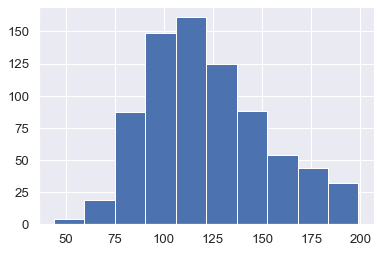

In [89]:
df['Glucose'].hist()

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

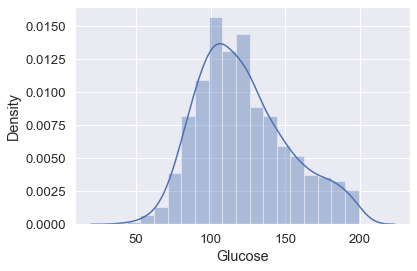

In [90]:
sns.distplot(df['Glucose'])

<AxesSubplot:>

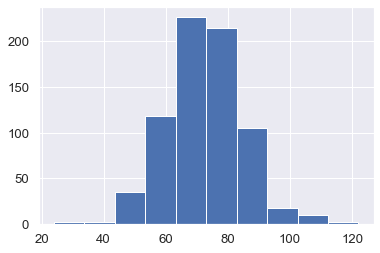

In [91]:
df['BloodPressure'].hist()

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

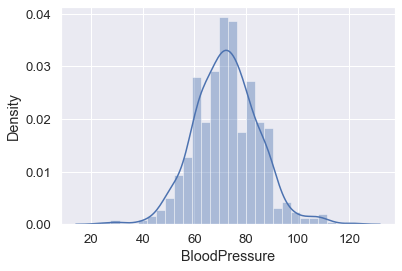

In [92]:
sns.distplot(df['BloodPressure'])

<AxesSubplot:>

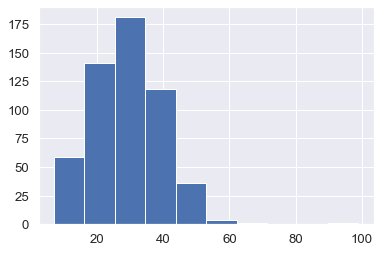

In [93]:
df['SkinThickness'].hist()

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

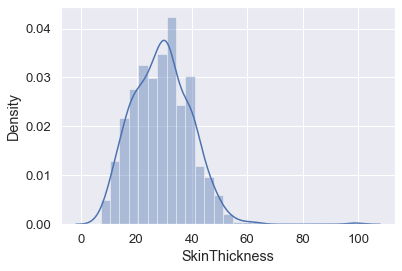

In [94]:
sns.distplot(df['SkinThickness'])

<AxesSubplot:>

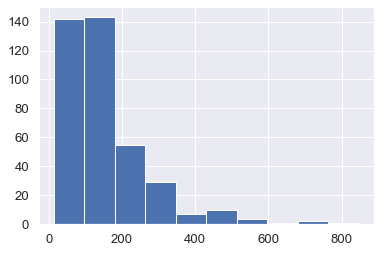

In [95]:
df['Insulin'].hist()

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

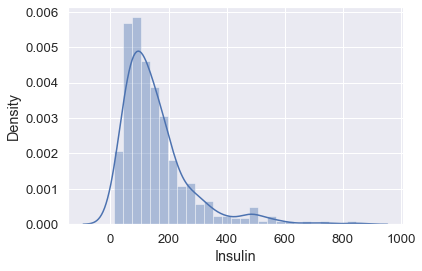

In [96]:
sns.distplot(df["Insulin"])

<AxesSubplot:>

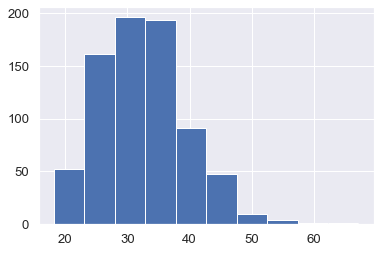

In [97]:
df['BMI'].hist()

<AxesSubplot:xlabel='BMI', ylabel='Density'>

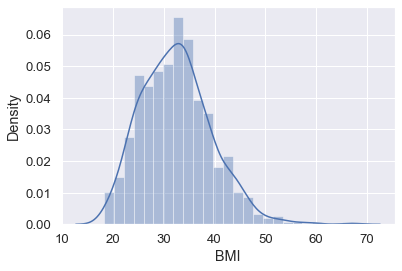

In [98]:
sns.distplot(df['BMI'])


From above histograms, it is clear that **Insulin** has highly skewed data distribution and remaining 4 variables have relatively balanced data distribution therefore we will treat missing values in these 5 variables as below:-
* Glucose              - replace missing values with mean of values.
* BloodPressure        - replace missing values with mean of values.
* SkinThickness        - replace missing values with mean of values.
* Insulin              - replace missing values with median of values.
* BMI                  - replace missing values with mean of values.

In [99]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [100]:
cols_mean_for_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[cols_mean_for_null] = df[cols_mean_for_null].fillna(df[cols_mean_for_null].mean())

In [101]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Previously mean value of Insuline column was around 155 but now it is decrease to 140

**(3) Create a count (frequency) plot describing the data types and the count of variables:**

In [103]:
df.dtypes

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [104]:
df.dtypes.value_counts()

float64    6
int64      3
dtype: int64

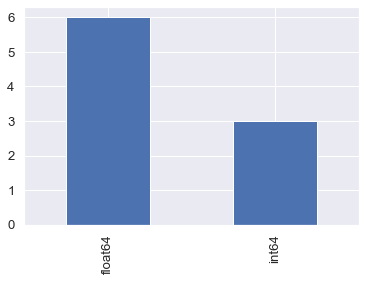

In [105]:
df.dtypes.value_counts().plot(kind='bar');

## Week 2:
### Data Exploration:
**(1) Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action:**
***checking data balancing***

In [106]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:>

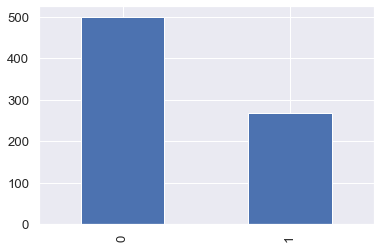

In [107]:
df['Outcome'].value_counts().plot(kind='bar')

Since classes in **Outcome** is little skewed so we will generate new samples using **SMOTE (Synthetic Minority Oversampling Technique)** for the class '**1**' which is under-represented in our data. We will use SMOTE out of many other techniques available since: 
* It generates new samples by interpolation.
* It doesn't duplicate data.

In [108]:
df_X = df.drop('Outcome', axis=1)
df_y = df['Outcome']
print(df_X.shape, df_y.shape)

(768, 8) (768,)


In [112]:
#!pip install imblearn

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
sm=SMOTE(random_state = 108)

In [124]:
df_X_resampled,df_y_resampled = sm.fit_resample(df_X,df_y)

In [125]:
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 8) (1000,)


In [126]:
df_y_resampled.value_counts()

0    500
1    500
Name: Outcome, dtype: int64

<AxesSubplot:>

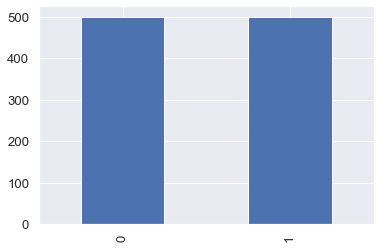

In [127]:
df_y_resampled.value_counts().plot(kind='bar')

**(2) Create scatter charts between the pair of variables to understand the relationships. Describe your findings:**

In [128]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3,164.686765,74.249021,29.153420,125.000000,42.767110,0.726091,29,1
996,0,138.913540,69.022720,27.713033,127.283849,39.177649,0.703702,24,1
997,10,131.497740,66.331574,33.149837,125.000000,45.820819,0.498032,38,1
998,0,105.571347,83.238205,29.153420,125.000000,27.728596,0.649204,60,1


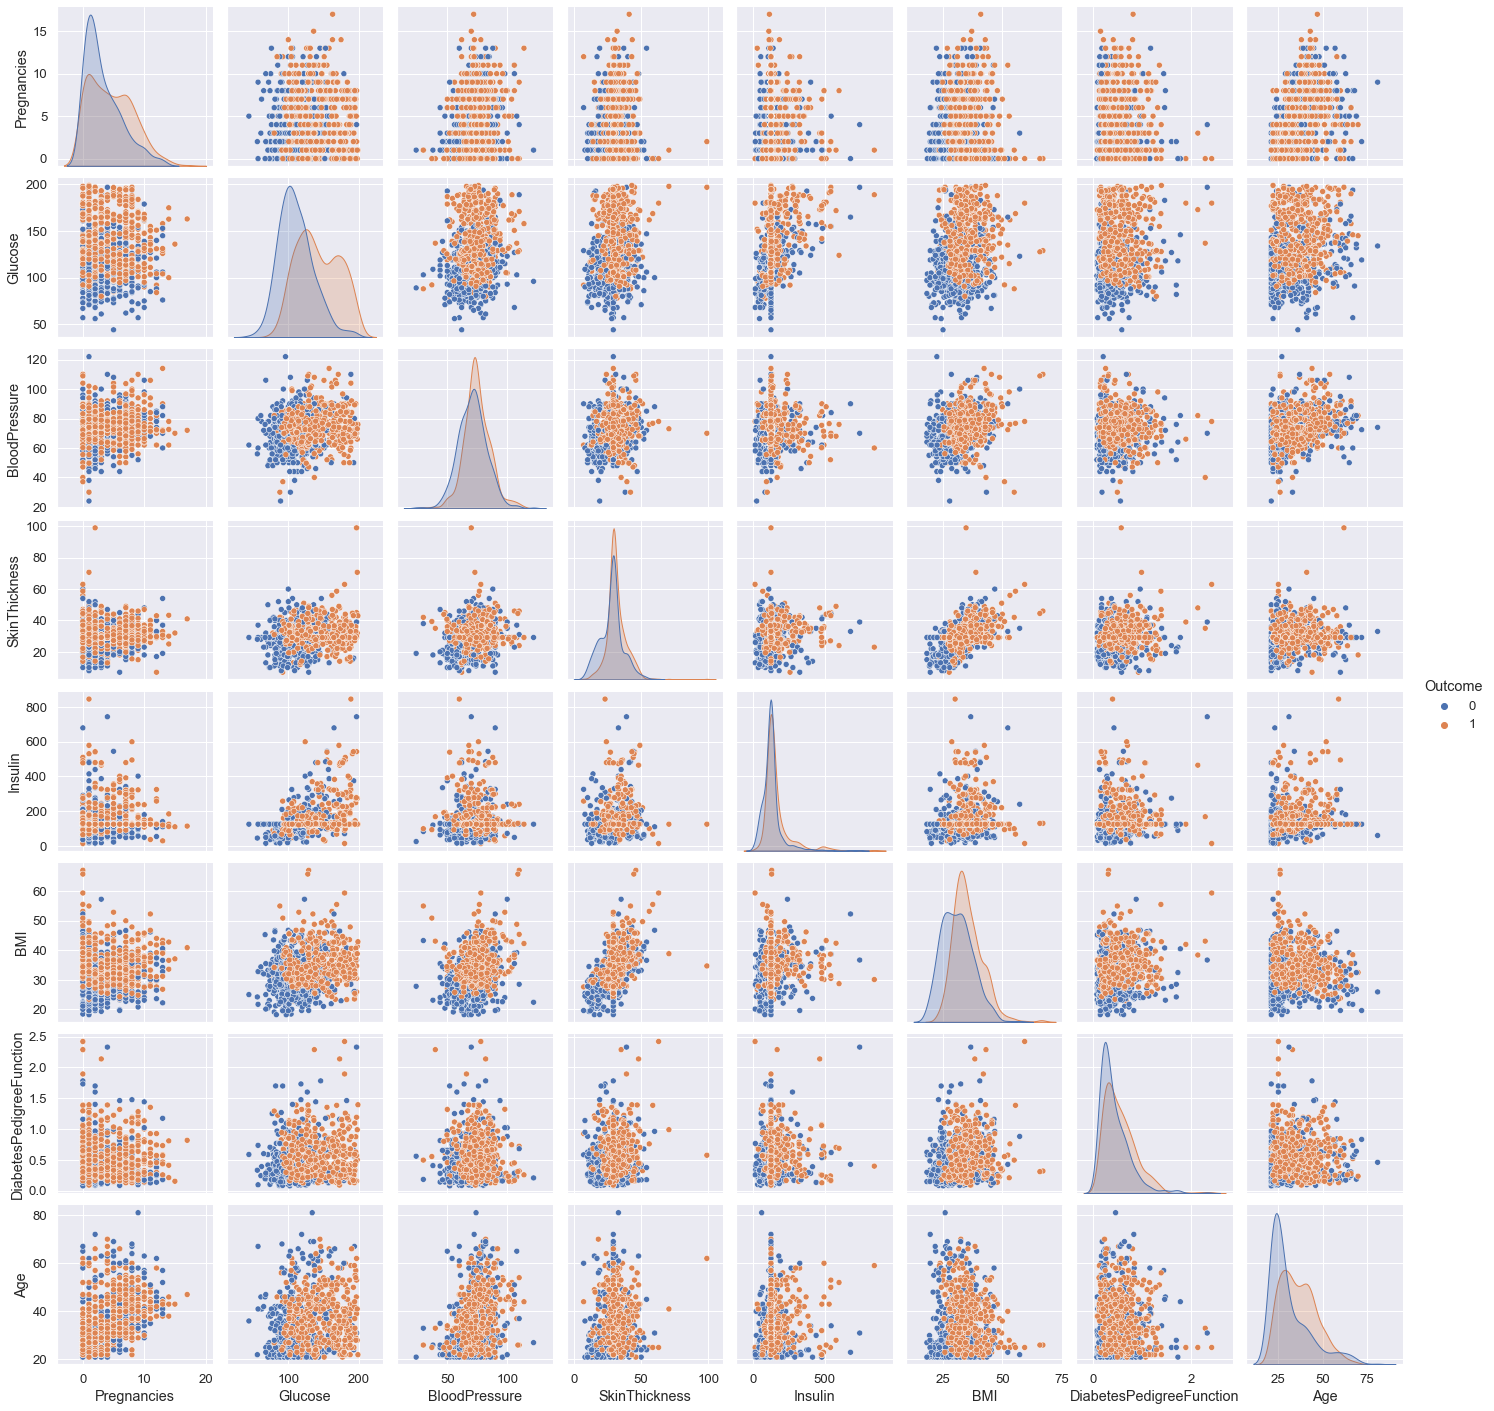

In [129]:
sns.pairplot(df_resampled,hue="Outcome")

We have some interesting observations from above scatter plot of pairs of features:
* **Glucose** alone is impressively good to distinguish between the **Outcome** classes.
* It seems none of pairs in the dataset is able to clealry distinguish between the **Outcome** classes.
* We need to use combination of features to build model for prediction of classes in **Outcome**.

**(3) Perform correlation analysis. Visually explore it using a heat map:**

In [130]:
df_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.079953,0.205232,0.082752,0.009365,0.021006,-0.040210,0.532660
Glucose,0.079953,1.000000,0.200717,0.189776,0.418830,0.242501,0.138945,0.235522
BloodPressure,0.205232,0.200717,1.000000,0.176496,0.034861,0.277565,-0.005850,0.332015
SkinThickness,0.082752,0.189776,0.176496,1.000000,0.170719,0.538207,0.120799,0.117644
Insulin,0.009365,0.418830,0.034861,0.170719,1.000000,0.168702,0.115187,0.096940
BMI,0.021006,0.242501,0.277565,0.538207,0.168702,1.000000,0.177915,0.017529
DiabetesPedigreeFunction,-0.040210,0.138945,-0.005850,0.120799,0.115187,0.177915,1.000000,0.010532
Age,0.532660,0.235522,0.332015,0.117644,0.096940,0.017529,0.010532,1.000000


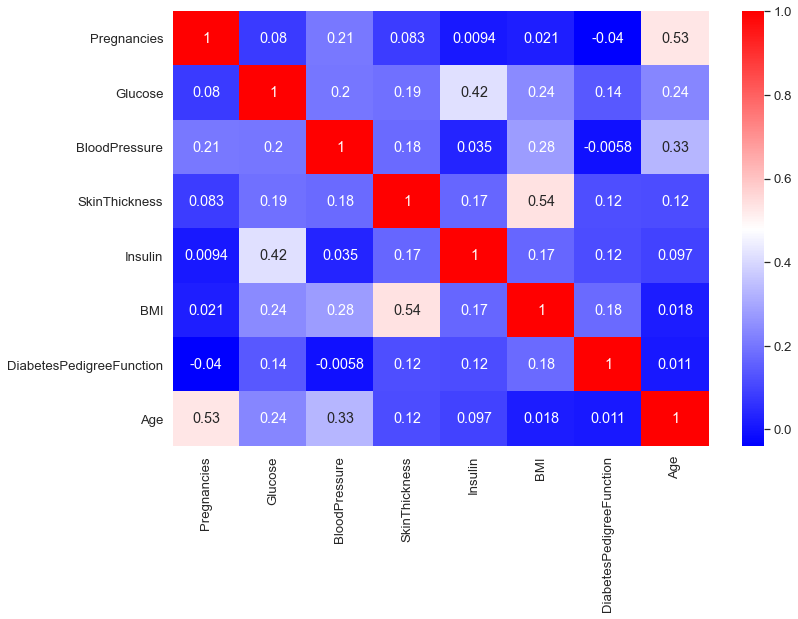

In [131]:
plt.figure(figsize=(12,8))
sns.heatmap(df_X_resampled.corr(), cmap='bwr', annot=True);

It appears from correlation matrix and heatmap that there exists significant correlation between some pairs such as -
* Age-Pregnancies
* BMI-SkinThickness
* Insulin-Glucose

Also we can see that no pair of variables have negative correlation.

## Week 3:
### Data Modeling:
**(1) Devise strategies for model building. It is important to decide the right validation framework. Express your thought process:**

**Answer:** Since this is a classification problem, we will be building all popular classification models for our training data and then compare performance of each model on test data to accurately predict target variable (Outcome):

    1) Logistic Regression
    2) Decision Tree
    3) RandomForest Classifier
    4) K-Nearest Neighbour (KNN) 
    5) Support Vector Machine (SVM)
    6) Naive Bayes
    7) Ensemble Learning -> Boosting -> Adaptive Boosting
    8) Ensemble Learning -> Boosting -> Gradient Boosting (XGBClassifier)
    
We will use use **GridSearchCV** with Cross Validation (CV) = 5 for training and testing model which will give us insight about model performance on versatile data.  It helps to loop through predefined hyperparameters and fit model on training set.
GridSearchCV performs hyper parameter tuning which will give us optimal hyper parameters for each of the model. We will again train model with these optimized hyper parameters and then predict test data to get metrics for comparing all models.

#### Performing Train - Test split on input data (To train and test model without Cross Validation and Hyper Parameter Tuning):

In [132]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report, auc, roc_curve, roc_auc_score, precision_recall_curve

In [133]:
X_train, X_test, y_train, y_test = train_test_split(df_X_resampled, df_y_resampled, test_size=0.20, random_state =10)

In [134]:
X_train.shape, X_test.shape

((800, 8), (200, 8))

### 2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

In [135]:
models = []
model_accuracy = []
model_f1 = []
model_auc_ROC = []
model_auc_PR=[]

#### 1) Logistic Regression:

In [136]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(max_iter=200,penalty='l2',solver='liblinear')

In [137]:
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [138]:
lr1.score(X_train,y_train)

0.745

In [139]:
lr1.score(X_test, y_test)

0.78

**Performance evaluation and optimizing parameters using GridSearchCV:** Logistic regression does not really have any critical hyperparameters to tune. However we will try to optimize one of its parameters 'C' with the help of GridSearchCV. So we have set this parameter as a list of values form which GridSearchCV will select the best value of parameter.

In [140]:
#HyperParameter Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score

In [141]:
parameters = {'C':np.logspace(-5, 5, 50)}
parameters

{'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
        6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
        4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
        2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
        1.84206997e-02, 2.94705170e-02, 4.71486636e-02, 7.54312006e-02,
        1.20679264e-01, 1.93069773e-01, 3.08884360e-01, 4.94171336e-01,
        7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
        5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
        3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
        2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
        1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
        9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
        6.25055193e+04, 1.00000000e+05])}

In [142]:
gs_lr = GridSearchCV(lr1, param_grid = parameters, cv=5, )
gs_lr.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=200, solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [143]:
gs_lr.best_estimator_

LogisticRegression(C=0.7906043210907702, max_iter=200, solver='liblinear')

In [144]:
gs_lr.best_params_

{'C': 0.7906043210907702}

In [145]:
gs_lr.best_score_

0.749

In [146]:
#Applying Best Parameter
lr2 = LogisticRegression(C=0.7906043210907702, max_iter=200,solver='liblinear')

In [147]:
lr2.fit(X_train,y_train)

LogisticRegression(C=0.7906043210907702, max_iter=200, solver='liblinear')

In [148]:
lr2.score(X_train,y_train)

0.74625

In [149]:
lr2.score(X_test, y_test)

0.77

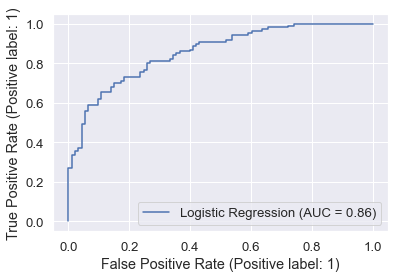

In [150]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr2, X_test, y_test, name = 'Logistic Regression')

In [151]:
#AUC of ROC
probs = lr2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.8557933875992363


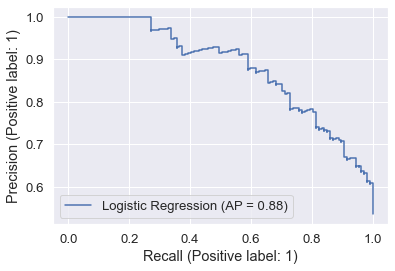

In [152]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lr2, X_test, y_test, name = 'Logistic Regression')

In [153]:
probs = lr2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_lr_pr = auc(recall, precision)

y_pred_test = lr2.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 


print("auc_lr_p_r : ",auc_lr_pr)
print("f1_score : ", f1)
print("Average Precision ",ap)

auc_lr_p_r :  0.8800740643657882
f1_score :  0.7870370370370371
Average Precision  0.8807080265690312


In [154]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_lr_pr)

In [155]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR)

['LR'] [0.77] [0.7870370370370371] [0.8557933875992363] [0.8800740643657882]


#### 2) Decision Tree:

In [156]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0)     

In [157]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [158]:
dt1.score(X_train,y_train)           # Decision Tree always 100% accuracy over train data

1.0

In [159]:
dt1.score(X_test, y_test)

0.745

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [160]:
parameters = {
    'max_depth':[1,2,3,4,5,None]
}

In [161]:
gs_dt = GridSearchCV(dt1, param_grid = parameters, cv=5, verbose=0)
gs_dt.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [162]:
gs_dt.best_params_

{'max_depth': 4}

In [163]:
gs_dt.best_score_

0.76

In [164]:
dt2 = DecisionTreeClassifier(max_depth=4,random_state=0)

In [165]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [166]:
dt2.score(X_train,y_train)

0.79375

In [167]:
dt2.score(X_test, y_test)

0.77

In [168]:
#feature Importance
dt2.feature_importances_

array([0.01644366, 0.54965028, 0.01690408, 0.        , 0.        ,
       0.23065988, 0.04152267, 0.14481943])

In [169]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

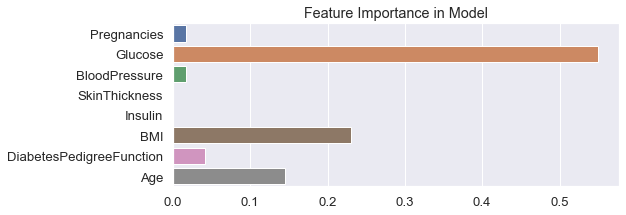

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=dt2.feature_importances_)
plt.title("Feature Importance in Model");

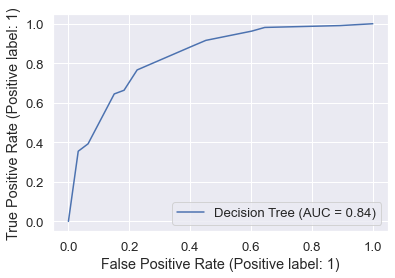

In [171]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt2, X_test, y_test, name = 'Decision Tree')

In [172]:
#AUC of ROC
probs = dt2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.8383077077680635


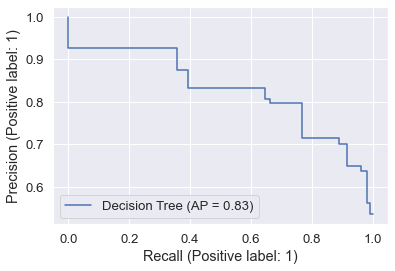

In [173]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(dt2, X_test, y_test, name = 'Decision Tree')

In [174]:
probs = dt2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_dt_pr = auc(recall, precision)

y_pred_test = dt2.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 

print("auc_dt_p_r : ",auc_dt_pr)
print("f1_score : ", f1)
print("average Precision : ", ap)

auc_dt_p_r :  0.8546011314845686
f1_score :  0.780952380952381
average Precision :  0.8273784586417424


In [175]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_dt_pr)

In [176]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR)

['LR', 'DT'] [0.77, 0.77] [0.7870370370370371, 0.780952380952381] [0.8557933875992363, 0.8383077077680635] [0.8800740643657882, 0.8546011314845686]


#### 3) RandomForest Classifier

In [177]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [178]:
rf1 = RandomForestClassifier(random_state=0)

In [179]:
rf1.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [180]:
rf1.score(X_train, y_train)            # Random Forest also 100% accuracy over train data always

1.0

In [181]:
rf1.score(X_test, y_test)

0.85

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [182]:
parameters = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,3,5]
}

In [185]:
gs_dt = GridSearchCV(estimator=rf1, param_grid=parameters, cv=5, verbose=0)
gs_dt.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [186]:
gs_dt.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

In [187]:
gs_dt.best_score_

0.813

In [188]:
rf1.feature_importances_

array([0.06742025, 0.2504919 , 0.08718214, 0.08443125, 0.09690667,
       0.16958432, 0.11250282, 0.13148066])

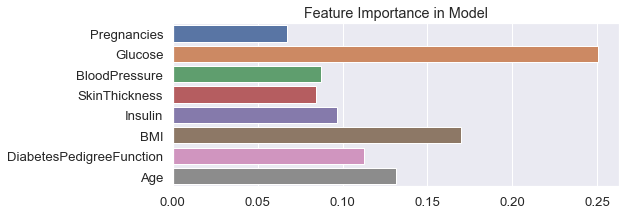

In [189]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=rf1.feature_importances_);
plt.title("Feature Importance in Model");

In [190]:
rf2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, n_estimators=100)

In [191]:
rf2.fit(X_train,y_train)

RandomForestClassifier()

In [192]:
rf2.score(X_train,y_train)

1.0

In [193]:
rf2.score(X_test, y_test)

0.835

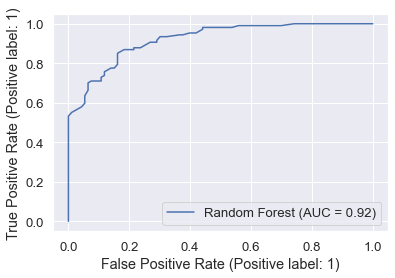

In [194]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf2, X_test, y_test, name = 'Random Forest')

In [195]:
#AUC of ROC
probs = rf2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.9204602552507286


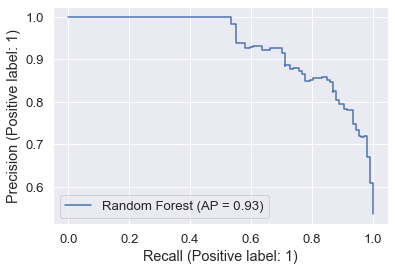

In [196]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rf2, X_test, y_test, name = 'Random Forest')

In [197]:
probs = rf2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_rf_pr = auc(recall, precision)

y_pred_test = rf2.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 

print("auc_rf_p_r : ",auc_rf_pr)
print("f1_score : ", f1)
print("average Precision : ", ap)

auc_rf_p_r :  0.9351791034353633
f1_score :  0.8493150684931506
average Precision :  0.9337615782397132


In [198]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_rf_pr)

In [199]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR,sep="\n")

['LR', 'DT', 'RF']
[0.77, 0.77, 0.835]
[0.7870370370370371, 0.780952380952381, 0.8493150684931506]
[0.8557933875992363, 0.8383077077680635, 0.9204602552507286]
[0.8800740643657882, 0.8546011314845686, 0.9351791034353633]


#### 4) K-Nearest Neighbour (KNN) Classification:

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)

In [201]:
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [202]:
knn1.score(X_train,y_train)

0.8875

In [203]:
knn1.score(X_test,y_test)

0.76

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [204]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}

In [205]:
gs_knn = GridSearchCV(estimator=knn1, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [206]:
gs_knn.best_params_

{'n_neighbors': 3}

In [207]:
gs_knn.best_score_

0.771

In [208]:
# gs_knn.cv_results_
gs_knn.cv_results_['mean_test_score']

array([0.76 , 0.771, 0.765, 0.757, 0.757, 0.739, 0.744, 0.746, 0.744,
       0.755, 0.751, 0.755, 0.754, 0.749])

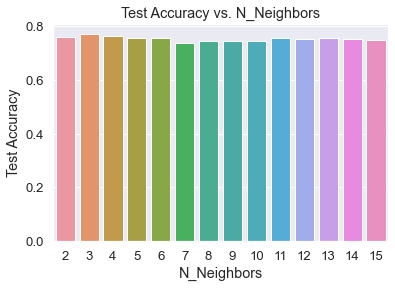

In [209]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors");

In [210]:
knn2 = KNeighborsClassifier(n_neighbors=3)

In [211]:
knn2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [212]:
knn2.score(X_train,y_train)

0.8875

In [213]:
knn2.score(X_test,y_test)

0.76

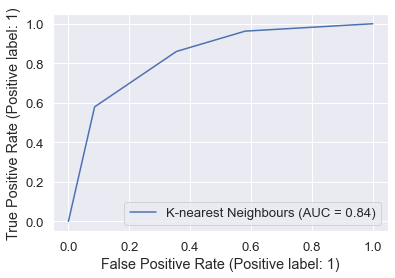

In [214]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(knn2, X_test, y_test, name = 'K-nearest Neighbours')

In [215]:
#AUC of ROC
probs = knn2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.8356446588282584


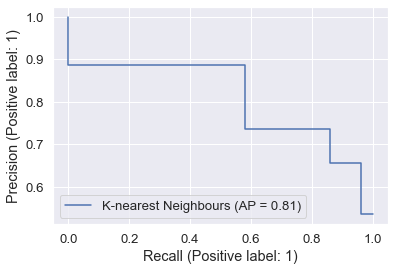

In [216]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(knn2, X_test, y_test, name = 'K-nearest Neighbours')

In [217]:
probs = knn2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_knn_pr = auc(recall, precision)

y_pred_test = knn2.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 

print("auc_knn_p_r : ",auc_knn_pr)
print("f1_score : ", f1)
print("average Precision : ", ap)

auc_knn_p_r :  0.8674882178360956
f1_score :  0.7931034482758621
average Precision :  0.8070172544284098


In [218]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_knn_pr)

In [219]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR,sep="\n")

['LR', 'DT', 'RF', 'KNN']
[0.77, 0.77, 0.835, 0.76]
[0.7870370370370371, 0.780952380952381, 0.8493150684931506, 0.7931034482758621]
[0.8557933875992363, 0.8383077077680635, 0.9204602552507286, 0.8356446588282584]
[0.8800740643657882, 0.8546011314845686, 0.9351791034353633, 0.8674882178360956]


#### 5) Support Vector Machine (SVM) Algorithm:

In [220]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf')

In [221]:
svm1.fit(X_train, y_train)

SVC()

In [222]:
svm1.score(X_train, y_train)

0.725

In [223]:
svm1.score(X_test, y_test)

0.765

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [224]:
parameters = {
    'C':[1, 5, 10, 15, 20, 25],
    'gamma':[0.001, 0.005, 0.0001, 0.00001]
}

In [225]:
gs_svm = GridSearchCV(estimator=svm1, param_grid=parameters, cv=5, verbose=0)
gs_svm.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [226]:
gs_svm.best_params_

{'C': 20, 'gamma': 0.005}

In [227]:
gs_svm.best_score_

0.8089999999999999

In [228]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.005, probability=True)

In [229]:
svm2.fit(X_train, y_train)

SVC(C=20, gamma=0.005, probability=True)

In [230]:
svm2.score(X_train, y_train)

0.99625

In [231]:
svm2.score(X_test, y_test)

0.8

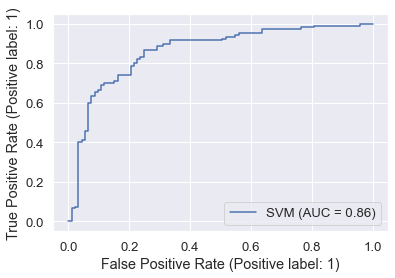

In [234]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm2, X_test, y_test, name = 'SVM')

In [235]:
#AUC of ROC
probs = svm2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.8620239171942519


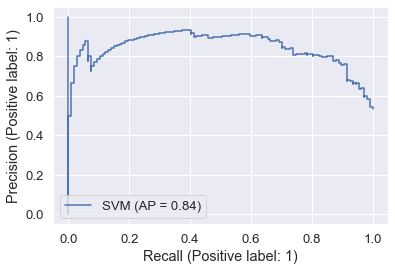

In [236]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(svm2, X_test, y_test, name = 'SVM')

In [237]:
probs = svm2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_svm_pr = auc(recall, precision)

y_pred_test = svm2.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 

print("auc_svm_p_r : ",auc_svm_pr)
print("f1_score : ", f1)
print("average Precision : ", ap)

auc_svm_p_r :  0.8342939860195236
f1_score :  0.8165137614678899
average Precision :  0.8399799185127018


In [238]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_svm_pr)

In [239]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR,sep="\n")

['LR', 'DT', 'RF', 'KNN', 'SVM']
[0.77, 0.77, 0.835, 0.76, 0.8]
[0.7870370370370371, 0.780952380952381, 0.8493150684931506, 0.7931034482758621, 0.8165137614678899]
[0.8557933875992363, 0.8383077077680635, 0.9204602552507286, 0.8356446588282584, 0.8620239171942519]
[0.8800740643657882, 0.8546011314845686, 0.9351791034353633, 0.8674882178360956, 0.8342939860195236]


#### 6) Naive Bayes Algorithm:

In [240]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
gnb = GaussianNB()

In [241]:
gnb.fit(X_train, y_train)

GaussianNB()

In [242]:
gnb.score(X_train, y_train)

0.73375

In [243]:
gnb.score(X_test, y_test)

0.775

**Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well.**

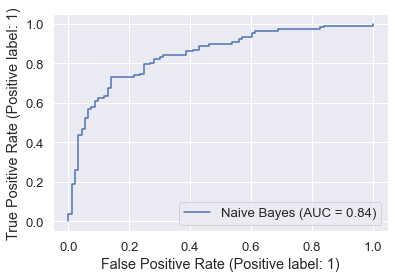

In [244]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb, X_test, y_test, name = 'Naive Bayes')

In [245]:
#AUC of ROC
probs = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.843332328409205


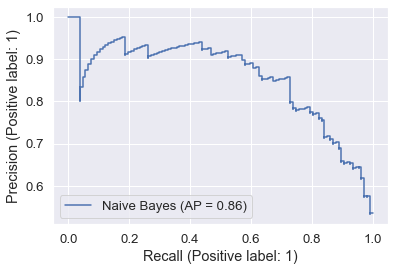

In [246]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(gnb, X_test, y_test, name = 'Naive Bayes')

In [247]:
probs = gnb.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_nb_pr = auc(recall, precision)

y_pred_test = gnb.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 

print("auc_nb_p_r : ",auc_nb_pr)
print("f1_score : ", f1)
print("average Precision : ", ap)

auc_nb_p_r :  0.8542732191258345
f1_score :  0.7906976744186047
average Precision :  0.855795572441866


In [248]:
models.append('NaivBy')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_nb_pr)

In [249]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR,sep="\n")

['LR', 'DT', 'RF', 'KNN', 'SVM', 'NaivBy']
[0.77, 0.77, 0.835, 0.76, 0.8, 0.775]
[0.7870370370370371, 0.780952380952381, 0.8493150684931506, 0.7931034482758621, 0.8165137614678899, 0.7906976744186047]
[0.8557933875992363, 0.8383077077680635, 0.9204602552507286, 0.8356446588282584, 0.8620239171942519, 0.843332328409205]
[0.8800740643657882, 0.8546011314845686, 0.9351791034353633, 0.8674882178360956, 0.8342939860195236, 0.8542732191258345]


#### 7) Ensemble Learning --> Boosting --> Adaptive Boosting:

In [250]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(n_estimators=100)

In [251]:
ada1.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [252]:
ada1.score(X_train,y_train)  

0.86375

In [253]:
ada1.score(X_test, y_test)

0.77

**Performance evaluation and optimizing parameters using cross_val_score:**

In [254]:
parameters = {'n_estimators': [100,200,300,400,500,700,1000]}

In [255]:
gs_ada = GridSearchCV(ada1, param_grid = parameters, cv=5, verbose=0)
gs_ada.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'n_estimators': [100, 200, 300, 400, 500, 700, 1000]})

In [256]:
gs_ada.best_params_

{'n_estimators': 500}

In [257]:
gs_ada.best_score_

0.785

In [258]:
ada1.feature_importances_

array([0.06, 0.14, 0.12, 0.16, 0.07, 0.21, 0.15, 0.09])

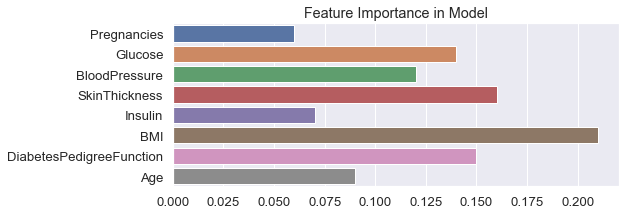

In [259]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=ada1.feature_importances_)
plt.title("Feature Importance in Model");

In [260]:
ada2 = AdaBoostClassifier(n_estimators=500)

In [261]:
ada2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=500)

In [262]:
ada2.score(X_train,y_train)

0.93125

In [263]:
ada2.score(X_test, y_test)

0.75

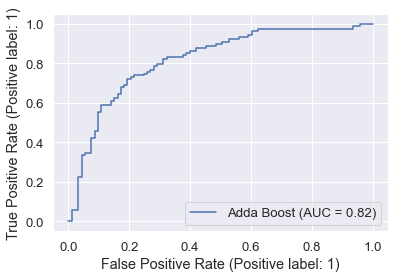

In [264]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(ada2, X_test, y_test, name = 'Adda Boost')

In [265]:
#AUC of ROC
probs = ada2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.81760627072656


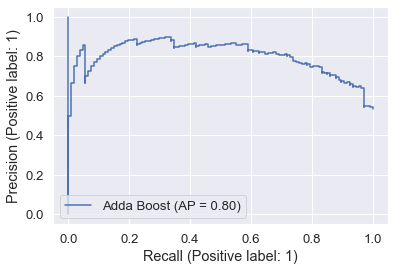

In [266]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(ada2, X_test, y_test, name = 'Adda Boost')

In [267]:
probs = ada2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_adaboost_pr = auc(recall, precision)

y_pred_test = ada2.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 

print("auc_adaboost_p_r : ",auc_adaboost_pr)
print("f1_score : ", f1)
print("average Precision : ", ap)

auc_adaboost_p_r :  0.792782093678146
f1_score :  0.7706422018348625
average Precision :  0.7987987450194838


In [268]:
models.append('Adda Boost')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_adaboost_pr)

In [269]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR,sep="\n")

['LR', 'DT', 'RF', 'KNN', 'SVM', 'NaivBy', 'Adda Boost']
[0.77, 0.77, 0.835, 0.76, 0.8, 0.775, 0.75]
[0.7870370370370371, 0.780952380952381, 0.8493150684931506, 0.7931034482758621, 0.8165137614678899, 0.7906976744186047, 0.7706422018348625]
[0.8557933875992363, 0.8383077077680635, 0.9204602552507286, 0.8356446588282584, 0.8620239171942519, 0.843332328409205, 0.81760627072656]
[0.8800740643657882, 0.8546011314845686, 0.9351791034353633, 0.8674882178360956, 0.8342939860195236, 0.8542732191258345, 0.792782093678146]


#### 8) Ensemble Learning --> Boosting --> Gradient Boosting (XGBClassifier):

In [270]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', nthread=4, seed=10)

In [271]:
xgb1.fit(X_train, y_train)

[17:46:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [272]:
xgb1.score(X_train, y_train) 

1.0

In [273]:
xgb1.score(X_test, y_test)

0.825

**Performance evaluation and optimizing parameters using GridSearchCV:**

In [274]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [275]:
gs_xgb = GridSearchCV(xgb1, param_grid = parameters, scoring = 'roc_auc', n_jobs = 10, cv=5, verbose=0)
gs_xgb.fit(df_X_resampled, df_y_resampled)

[17:48:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4, nthread=4,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=10, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=10, subsample=1,
                                     tree_method='exact',
                                     use_label_encoder=False,
                                     validate_parameters=1, ...),
             n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc')

In [276]:
gs_xgb.best_params_

{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 180}

In [277]:
gs_xgb.best_score_

0.88522

In [278]:
xgb1.feature_importances_

array([0.08075611, 0.25835875, 0.07994004, 0.07796188, 0.11294965,
       0.16338274, 0.09778506, 0.12886585], dtype=float32)

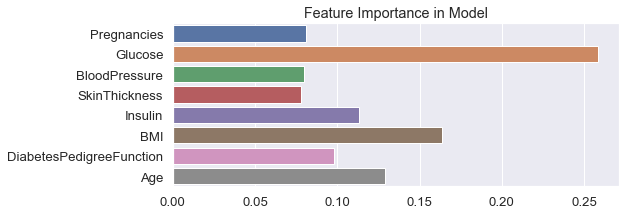

In [279]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=xgb1.feature_importances_)
plt.title("Feature Importance in Model");

In [280]:
xgb2 = XGBClassifier(use_label_encoder=False, objective = 'binary:logistic', 
                    nthread=4, seed=10, learning_rate= 0.05, max_depth= 7, n_estimators= 180)

In [281]:
xgb2.fit(X_train,y_train)

[17:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=180, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=10,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [282]:
xgb2.score(X_train,y_train)

0.995

In [283]:
xgb2.score(X_test, y_test)

0.805

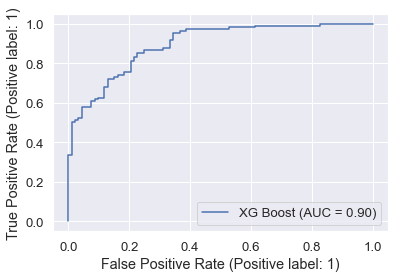

In [284]:
# ROC Curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(xgb2, X_test, y_test, name = 'XG Boost')

In [285]:
#AUC of ROC
probs =xgb2.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

auc_score=roc_auc_score(y_test,probs)
print("auc_score_roc : ",auc_score)

auc_score_roc :  0.8956888754899004


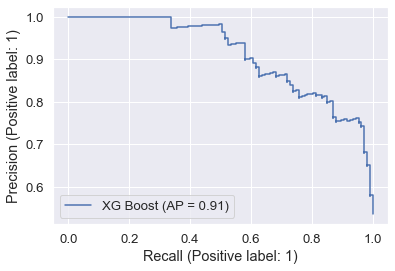

In [286]:
# Precision-Recall Curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(xgb2, X_test, y_test, name = 'XG Boost')

In [287]:
probs = xgb2.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve

auc_xgboost_pr = auc(recall, precision)

y_pred_test = xgb2.predict(X_test) 
f1 = f1_score(y_test,y_pred_test)                                    # calculate F1 score

ap = average_precision_score(y_test, probs) 

print("auc_xgboost_p_r : ",auc_xgboost_pr)
print("f1_score : ", f1)
print("average Precision : ", ap)

auc_xgboost_p_r :  0.9116160937471075
f1_score :  0.8266666666666667
average Precision :  0.9120616937401599


In [288]:
models.append('XG Boost')
model_accuracy.append(accuracy_score(y_test, y_pred_test))
model_f1.append(f1)
model_auc_ROC.append(auc_score)
model_auc_PR.append(auc_xgboost_pr)

In [289]:
print(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR,sep="\n")

['LR', 'DT', 'RF', 'KNN', 'SVM', 'NaivBy', 'Adda Boost', 'XG Boost']
[0.77, 0.77, 0.835, 0.76, 0.8, 0.775, 0.75, 0.805]
[0.7870370370370371, 0.780952380952381, 0.8493150684931506, 0.7931034482758621, 0.8165137614678899, 0.7906976744186047, 0.7706422018348625, 0.8266666666666667]
[0.8557933875992363, 0.8383077077680635, 0.9204602552507286, 0.8356446588282584, 0.8620239171942519, 0.843332328409205, 0.81760627072656, 0.8956888754899004]
[0.8800740643657882, 0.8546011314845686, 0.9351791034353633, 0.8674882178360956, 0.8342939860195236, 0.8542732191258345, 0.792782093678146, 0.9116160937471075]


In [290]:
model_summary = pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc_ROC,model_auc_PR), columns = ['model','accuracy','f1_score','auroc','aupr'])
model_summary = model_summary.set_index('model')

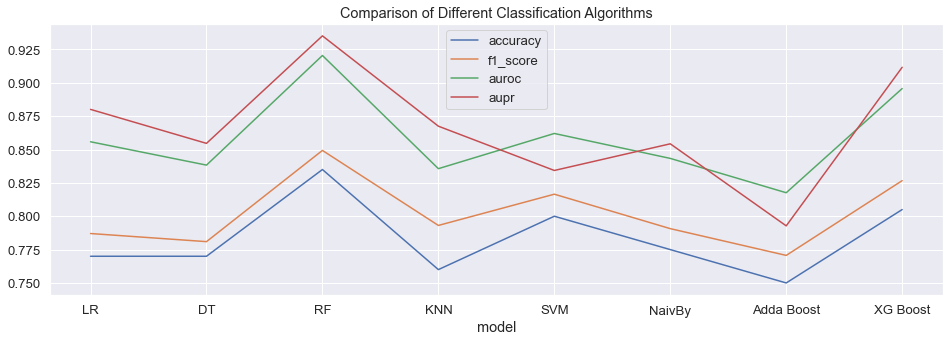

In [291]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

In [292]:
model_summary

,accuracy,f1_score,auroc,aupr
model,,,,
LR,0.770,0.787037,0.855793,0.880074
DT,0.770,0.780952,0.838308,0.854601
RF,0.835,0.849315,0.920460,0.935179
KNN,0.760,0.793103,0.835645,0.867488
SVM,0.800,0.816514,0.862024,0.834294
NaivBy,0.775,0.790698,0.843332,0.854273
Adda Boost,0.750,0.770642,0.817606,0.792782
XG Boost,0.805,0.826667,0.895689,0.911616


**Among all models, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.**

#### FINAL CLASSIFIER:

In [293]:
final_model = rf2

## Week 4:
### Data Modeling:
**(1) Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used:**

In [294]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        93
           1       0.83      0.87      0.85       107

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



In [295]:
confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[74 19]
 [14 93]]


In [296]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

In [297]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%model_summary.loc["RF","auroc"])

Accuracy: 0.835
Precision: 0.830
Sensitivity: 0.869
Specificity: 0.796
AUC: 0.920


**Sensitivity and Specificity:** By changing the threshold, target classification will be changed hence the sensitivity and specificity will also be changed. Which one of these two we should maximize? What should be ideal threshold?

Ideally we want to maximize both Sensitivity & Specificity. But this is not possible always. There is always a trade-off.
Sometimes we want to be 100% sure on Predicted negatives, sometimes we want to be 100% sure on Predicted positives. Sometimes we simply don’t want to compromise on sensitivity sometimes we don’t want to compromise on specificity. 

The threshold is set based on business problem. There are some cases where Sensitivity is important and need to be near to 1.
There are business cases where Specificity is important and need to be near to 1. We need to understand the business problem and decide the importance of Sensitivity and Specificity.

### Data Reporting:
**2. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:**

        a. Pie chart to describe the diabetic or non-diabetic population
        b. Scatter charts between relevant variables to analyze the relationships
        c. Histogram or frequency charts to analyze the distribution of the data
        d. Heatmap of correlation analysis among the relevant variables
        e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.


## PLEASE REFER TABLEAU FILE FOR DASHBOARD AND VISUALIZATION CREATED FOR DATA REPORTING.

In [ ]:
#Healthcare Dashboard
https://public.tableau.com/app/profile/tarun.kumar.mohapatra/viz/Healthcare_Dashboard_16701537352940/Dashboard1